In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from dp import read_data
from matplotlib import pyplot

In [2]:
df= read_data('data_processing/rodina2_data.log')

In [3]:
df

,latency,src_regs,dst_regs,isload,isstore,memwidth,op,sp_op,op_pipe,mem_op,oprd_type,initiation_interval,active_inst,inst,issue,execution
0,4,2,1,0,0,0,6,0,3,0,-1,2,16,34,1,9
1,4,0,1,0,0,0,1,0,3,0,-1,2,16,72,1,8
2,4,4,0,0,0,0,1,0,3,0,-1,2,0,77,2,10
3,4,0,1,0,0,0,1,0,3,0,-1,2,16,72,2,8
4,4,2,1,0,0,0,6,0,3,0,-1,2,16,31,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71878,1,2,0,0,1,4,11,0,6,0,-1,1,16,78,9,5
71879,1,2,0,0,1,4,11,0,6,0,-1,1,16,78,1,6
71880,4,2,1,0,0,0,6,0,3,0,-1,2,16,39,8,9
71881,1,0,0,0,0,0,17,0,3,0,-1,1,16,11,1,5


# Issue model

In [4]:
output= df[['issue']]
inp= df.drop(['issue','execution'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(inp, output, random_state=42, test_size=0.1)
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)

/Users/santosh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

In [5]:
# Print Coefficient of determination R^2
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("MSE error: %.3f "%mse)
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
feature_importance = gbr.feature_importances_


MSE error: 390.910 
Model Accuracy: 0.406


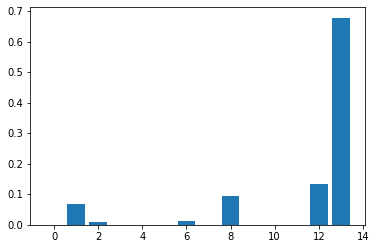

In [6]:
pyplot.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
pyplot.show()

# Execution model

In [7]:
output= df[['execution']]
inp= df.drop(['issue','execution'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(inp, output, random_state=42, test_size=0.1)
gbr_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(X_train, y_train)

/Users/santosh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.01, min_samples_split=5,
                          n_estimators=1000)

MSE error: 125.964 
Model Accuracy: 0.947


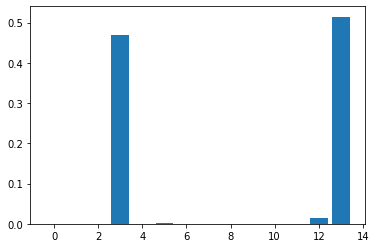

In [8]:
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("MSE error: %.3f "%mse)
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
feature_importance = gbr.feature_importances_
pyplot.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
pyplot.show()

In [9]:
X_train

,latency,src_regs,dst_regs,isload,isstore,memwidth,op,sp_op,op_pipe,mem_op,oprd_type,initiation_interval,active_inst,inst
11878,1,1,1,1,0,4,8,0,6,0,-1,1,32,54
31491,4,0,1,0,0,0,1,0,3,0,-1,2,32,7
34419,4,0,1,0,0,0,1,0,3,0,-1,2,1,63
51891,4,2,1,0,0,0,6,0,3,0,-1,2,1,32
27697,4,2,1,0,0,0,6,0,3,0,-1,2,1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,4,2,0,0,0,0,6,0,3,0,-1,2,32,41
6265,1,1,1,1,0,4,8,0,6,0,-1,1,1,52
54886,4,3,1,0,0,0,5,0,1,0,-1,2,16,18
860,4,2,1,0,0,0,1,0,3,0,-1,2,32,70


# Training with FC

In [10]:
output= df[['issue','execution']]
inp= df.drop(['issue','execution'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(inp, output, random_state=42, test_size=0.1)

AttributeError: 'Rectangle' object has no property 'column'

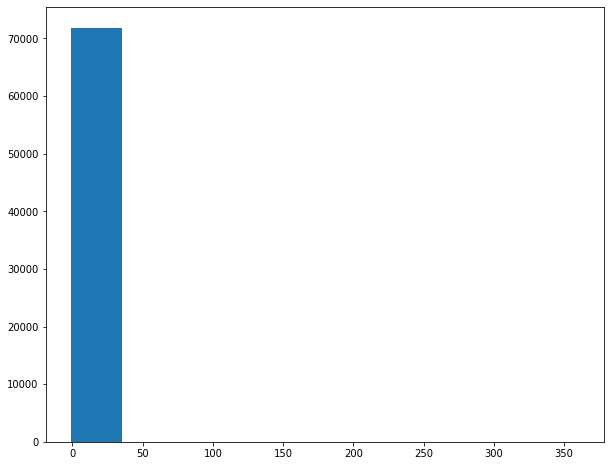

In [11]:
ax = df.plot.hist(column=["inst"], figsize=(10, 8))